## **Model Loading**

In [58]:
from lib.getPicture import capturePicture
from keras.models import load_model
import keras.utils as image
from random import randint
import numpy as np
import time
import sys
import cv2
from termcolor import colored, cprint
import matplotlib.pyplot as plt
from datetime import datetime
model = load_model('models/PKM-KC_2.h5')

In [59]:
date = datetime.now()
path = "Test_"+date.strftime("%d_%m_%Y_%H_%M_%S")+'.jpg'

## **Get Picture**

In [60]:

capturePicture(name=path)

Image saved as Test_07_12_2023_16_53_27.jpg


'Test_07_12_2023_16_53_27.jpg'

In [61]:
IMG_SIZE = 300
imgOutput = None
def loadImage(img_path, show=False):
    global imgOutput
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_tensor = image.img_to_array(img)                   
    img_tensor = np.expand_dims(img_tensor, axis=0)    
    img_tensor /= 255.                                 
    if show:
        imgOutput = img_tensor[0]
    return img_tensor

img = loadImage('imgTest/'+path, True)

## **Model Prediction**

1/1 [==============================] - 0s 88ms/step
Probability: 99.39%
Tingkat Nafsu Makan Tinggi


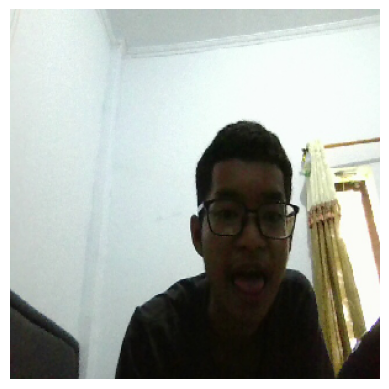

In [62]:
output = model.predict(img)
color_txt = 'green'
if output < 0.5:
  color_txt = 'red'
  
cprint(f'Probability: {output[0][0]*100:.2f}%', color_txt)
print("="*26)
print("Tingkat Nafsu Makan Tinggi" if output >= 0.5 else "Tingkat Nafsu Makan Rendah")
plt.imshow(imgOutput)                           
plt.axis('off')
plt.show()